<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# 3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Описание проекта:**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных:**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Изучение данных из файла

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# Прочитаем файл и предварительно посмотрим на него
aparts = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
aparts.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим много пропущенных значений в таблице.

In [3]:
# Более детально рассмотрим данные
aparts.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим, что часть значений искажена, например, 100-метровые потолки. Необходимо перепроверить данные.

In [4]:
# Рассмотрим структуру данных
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Видим, что некоторые тип данных не соответствуют самим данным, например, дата публикации object, количество этажей float, необходимо привести типы данных в соответствие.  
Также подтверждаем множество пропущенных значений.

### Вывод

Рассмотрев исходную таблицу, видим, что в ней есть большое количество пропущенных значений, не все типы соответствую данным и часть данных выглядит нереально.

## Предобработка данных

Скорее всего, в столбцах balcony, parks_around3000, ponds_around3000, is_apartment не указали данные, так как эти параметры отсутсвуют для продаваемых квартир, поэтому пропуски можно заменить на 0. Также приведем данные в этих столбцах к нужным типам.

In [5]:
aparts['balcony'] = aparts['balcony'].fillna(0).astype(int)
aparts['parks_around3000'] = aparts['parks_around3000'].fillna(0).astype(int)
aparts['ponds_around3000'] = aparts['ponds_around3000'].fillna(0).astype(int)
aparts['is_apartment'] = aparts['is_apartment'].fillna(0).astype(bool)
aparts['floors_total'] = aparts['floors_total'].fillna(0).astype(int)
aparts['first_day_exposition'] = pd.to_datetime(aparts['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

In [6]:
# Заполним пропуски жилой площади медианным значением в зависимости от числа комнат
aparts['living_area'] = aparts['living_area'].fillna(aparts.groupby('rooms')['living_area'].transform('median'))

In [7]:
# Проставим отсутствующую площадь кухни, как разницу между нежилой и жилой площадью
aparts['kitchen_area'] = aparts['kitchen_area'].fillna(aparts['total_area'] - aparts['living_area'])

В названии населенного пункта, скорее всего пропуски соответствуют Санкт-Петербургу, для большинства людей город "по умолчанию", произведем замену.

In [8]:
aparts['locality_name'] = aparts['locality_name'].fillna('Санкт-Петербург')

In [9]:
# удалим строки с пропущенными значениями floors_total, их немного и они не поалияют на анализ
aparts.dropna(subset = ['floors_total'], inplace = True)

In [10]:
# Заполним пропущенные значения высоты потолков медианными значениями в зависимости от населенного пункта
aparts['ceiling_height'] = aparts.groupby('locality_name')['ceiling_height'].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
# Заменим аномальные значения высоты потолков на средние
height = aparts['ceiling_height'].mean()
def ceiling_height(row):
    
    if row > 3:
        return height
    else:
        return row

In [12]:
aparts['ceiling_height'] = aparts['ceiling_height'].apply(ceiling_height)

In [13]:
# Дозаполним оставшиеся пропущенные значения высоты потолков срдним
aparts['ceiling_height'] = aparts['ceiling_height'].fillna(aparts['ceiling_height'].mean())

In [14]:
# Для заполнения пропущенных значений расстояния до центра найдем среднее расстояние для СПб и пригорода
spb_nearest = aparts.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].mean()
not_spb_nearest = aparts.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].mean()
print(spb_nearest, not_spb_nearest)

11600.449716578561 30600.552642194434


In [15]:
# Заменим пропущенные значения расстояний до центра в зависимости от населенного пункта
aparts.loc[(aparts['cityCenters_nearest'].isnull()) & (aparts['locality_name'] == 'Санкт-Петербург'), 'cityCenters_nearest'] = aparts.loc[(aparts['cityCenters_nearest'].isnull()) & (aparts['locality_name'] == 'Санкт-Петербург'), 'cityCenters_nearest'].fillna(spb_nearest)

aparts.loc[(aparts['cityCenters_nearest'].isnull()) & (aparts['locality_name'] != 'Санкт-Петербург'), 'cityCenters_nearest'] = aparts.loc[(aparts['cityCenters_nearest'].isnull()) & (aparts['locality_name'] != 'Санкт-Петербург'), 'cityCenters_nearest'].fillna(not_spb_nearest)

In [16]:
aparts.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

Видим, что все необходимые столбцы заполнены, пропусков нет.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:

- цену квадратного метра;  
- день недели, месяц и год публикации объявления;  
- этаж квартиры;   
- соотношение жилой и общей площади;   
- отношение площади кухни к общей.

In [17]:
# Чтобы узнать цену квадратного метра, разделим стоимость квартиры на общую площадь
aparts['sq_m_price'] = (aparts['last_price'] / aparts['total_area']).round().astype(int)

In [18]:
# Добавим столбцы: день недели(exposition_weekday), где понедельник - 0, а воскресенье - 6; месяц(exposition_month); и год публикации(exposition_year).
aparts['exposition_weekday'] = aparts['first_day_exposition'].dt.weekday
aparts['exposition_month'] = aparts['first_day_exposition'].dt.month
aparts['exposition_year'] = aparts['first_day_exposition'].dt.year

Добавим столбец с категорией этажности: первый, последний, другой. 

In [19]:
# Напишем функцию для определения категории этажности

def floor_type(row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

In [20]:
aparts['floor_type'] = aparts.apply(floor_type, axis=1)

In [21]:
# Добавим столбец соотношения жилой и общей площади
aparts['live_ratio'] = (aparts['living_area'] / aparts['total_area'])

In [22]:
# Добавим столбец соотношения площади кухни и общей площади
aparts['kitchen_ratio'] = (aparts['kitchen_area'] / aparts['total_area'])

In [23]:
# Проверим обновленную таблицу
aparts.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type,live_ratio,kitchen_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16,51.00,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.630000,11,18.60,1,False,...,0,NaN,81.0,82921,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.700000,5,34.30,4,False,...,2,574.0,558.0,92786,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.700000,14,45.00,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,0.283019,0.716981
4,2,10000000.0,100.00,2018-06-19,2,2.734051,14,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.600000,12,14.40,5,False,...,0,NaN,55.0,95066,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.640000,26,10.60,6,False,...,0,NaN,155.0,99196,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.700000,24,30.50,22,False,...,0,NaN,NaN,110545,3,4,2019,другой,0.425978,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.700000,27,15.43,26,False,...,0,NaN,189.0,87455,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,0,NaN,289.0,88525,6,2,2017,другой,0.714754,0.106557


В таблицу добавлены все необходимые столбцы. Проверим данные на дубликаты.

In [24]:
aparts.duplicated().sum()

0

Все необходимые столбцы добавлены, дубликаты не выявлены

In [25]:
aparts.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,exposition_weekday,exposition_month,exposition_year,live_ratio,kitchen_ratio
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.663697,10.635090,34.321982,5.892358,11.953056,0.591080,...,490.804555,0.590911,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.563845,0.209119
std,5.682529,1.088701e+07,35.654083,1.078405,0.123481,6.616396,21.700627,4.885249,11.180180,0.959298,...,342.317995,0.883999,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.110933,0.107681
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-44.400000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.000000,1.000000,2014.000000,0.021583,-0.514286
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.200000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658550e+04,1.000000,3.000000,2017.000000,0.490326,0.136364
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.300000,4.000000,9.700000,0.000000,...,455.000000,0.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.566596,0.181818
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,13.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,1.142560e+05,4.000000,10.000000,2018.000000,0.638298,0.254717
max,50.000000,7.630000e+08,900.000000,19.000000,3.000000,60.000000,409.700000,33.000000,476.500000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.514286,0.964380


## Исследовательский анализ данных

Изучим параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого из них. Посмотрим, как выглядят диаграмма "ящик с усами" для этих параметров и избавимся от выбросов.

In [26]:
# Напишем функцию построения гистограмм
def draw_hist(col, xmin=0, xmax=300):
    aparts[col].hist(bins=50, range=(xmin, xmax))

In [27]:
# Напишем функцию пстроения диаграммы "ящик с усами"
def draw_boxplot(col, ymin=0, ymax=300):
    plt.ylim(ymin, ymax)
    aparts.boxplot(col)

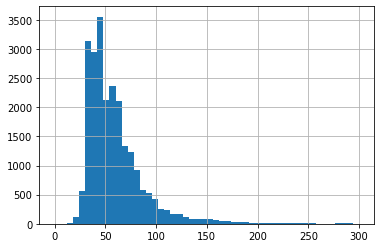

In [28]:
# построим гистограмму общей площади
draw_hist('total_area', 0, 300)

Гистограмма общей площади выглядит реально - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 30-75 кв.м, также видим мощный пик у значения 45 кв.м. После значения 170 кв.м количество квартир стремительно убывает.

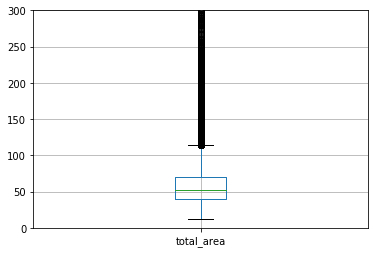

In [29]:
draw_boxplot('total_area')

Разброс значений находится в диапазоне от 12 кв.м до 118 кв.м.

In [30]:
# Удалим выбросы по площади
aparts = aparts.query('total_area>=10 and total_area<=120')

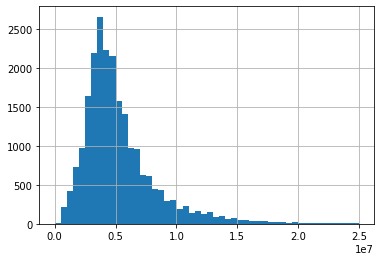

In [31]:
# Рассмотрим гистограмму цен
draw_hist('last_price', 0, 25000000)

Гистограмма похожа на нормальное распределение с пиком у значения цены 3,5 млн. и резким снижением количества квартир, дороже 15 млн.

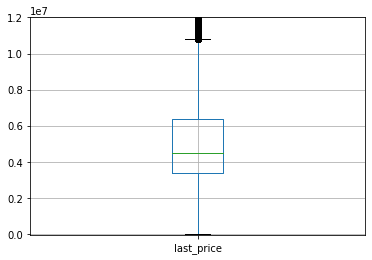

In [32]:
# Построим "ящик с усами" для цен
draw_boxplot('last_price', -50000, 12000000)

Распределение значений находится в интервале от нуля до 11 млн. Проверим значения около 0.

In [33]:
# Посмотрим квартиры, стоимостью менее 500 тыс.
aparts.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type,live_ratio,kitchen_ratio
5698,7,450000.0,42.0,2017-07-31,2,2.615000,1,23.0,1,False,...,0,NaN,233.0,10714,0,7,2017,первый,0.547619,0.138095
6859,6,490000.0,40.0,2017-12-11,1,2.663697,5,17.6,3,False,...,0,NaN,43.0,12250,0,12,2017,другой,0.440000,0.560000
8793,7,12190.0,109.0,2019-03-20,2,2.750000,25,32.0,25,False,...,0,NaN,8.0,112,2,3,2019,последний,0.293578,0.371560
9581,7,450000.0,43.4,2018-08-31,2,2.663697,5,30.3,3,False,...,0,NaN,96.0,10369,4,8,2018,другой,0.698157,0.126728
10782,3,490000.0,29.1,2016-05-05,1,2.500000,5,17.0,5,False,...,0,NaN,719.0,16838,3,5,2016,последний,0.584192,0.189003
14911,5,430000.0,54.0,2018-06-26,2,2.663697,3,30.5,3,False,...,0,NaN,44.0,7963,1,6,2018,последний,0.564815,0.435185
16032,8,480000.0,32.0,2019-01-06,1,2.500000,2,16.0,1,False,...,0,NaN,83.0,15000,6,1,2019,первый,0.500000,0.500000
16219,14,450000.0,38.5,2018-07-11,2,2.650000,2,30.5,1,False,...,0,NaN,45.0,11688,2,7,2018,первый,0.792208,0.207792
16274,18,440000.0,40.0,2018-07-10,1,2.663697,5,17.6,1,False,...,0,NaN,45.0,11000,1,7,2018,первый,0.440000,0.560000
17456,7,430000.0,30.4,2019-04-22,1,2.500000,2,16.0,1,False,...,0,NaN,NaN,14145,0,4,2019,первый,0.526316,0.197368


Видим, что выделяется одна квартира стоимостью 12190, похоже на ошибку.

In [34]:
# Удалим из выборки выбросы
aparts = aparts.query('last_price>100000 and last_price<=11000000')

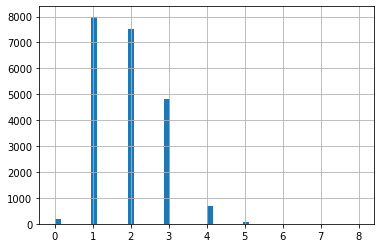

In [35]:
# Построим гистограмму по количеству комнат
draw_hist('rooms', 0, 8)

У больщинства продаваемых квартир от 1 до 3 комнат.

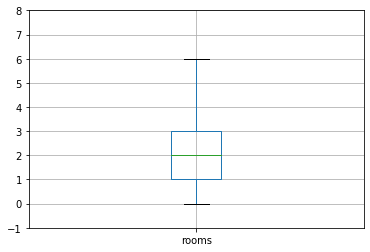

In [36]:
# Построим "ящик с усами" для количества комнат
draw_boxplot('rooms', -1, 8)

Большинство значений находится в диапазоне от 0 до 6 комнат, оставим их в выборке.

In [37]:
aparts = aparts.query('0 <= rooms <=6')

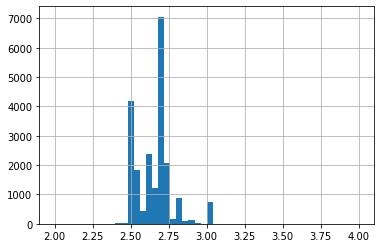

In [38]:
# Рассмотрим гистограмму высоты потолков
draw_hist('ceiling_height', 2, 4)

Большинство значений находится в диапазоне от 2.5 до 3 м.

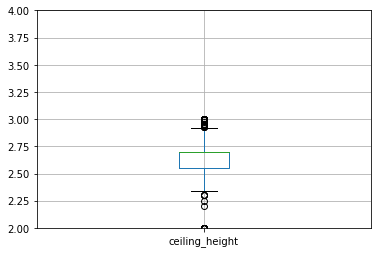

In [39]:
# Построим "ящик с усами" для высоты потолков
draw_boxplot('ceiling_height', 2, 4)

In [40]:
# Избавимся от выбросов в высоте потолков
aparts = aparts.query('2.25 <= ceiling_height <= 3')

Построим и рассмотрим гистограмму продолжительности продаж квартир

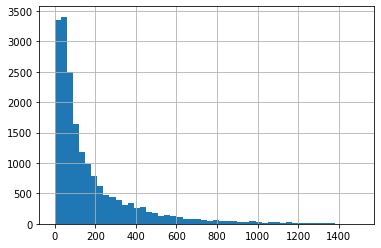

In [41]:
draw_hist('days_exposition', 0, 1500)

Видим распределение Пуассона, характерное для временных значений.

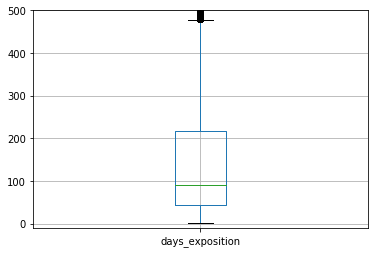

In [42]:
draw_boxplot('days_exposition', -10, 500)

На диаграмме видим, что большинство продаж происходят в интервале от 40 до 220 дней.

In [43]:
aparts['days_exposition'].describe()

count    18724.000000
mean       171.630421
std        209.095915
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что среднее значение продолжительности продаж почти в 2 раза больше медианы. Так влияет небольшое количество экстремальных значений продолжительности: при значении 4 квартиля на уровне 480, максимальное значение составляет 1580 дн.
Если продажа произошла в течение 43 дней, то можно считать это быстрой продажей (только 25% продаж такие быстрые). Если продажа длится более 217 дней, то она затянулась.

In [44]:
# Исключим выбросы из выборки
aparts = aparts.query('0 < days_exposition <= 480')

In [45]:
# Посмотрим итоговый датасет и сравним с первоначальным
aparts.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,exposition_weekday,exposition_month,exposition_year,live_ratio,kitchen_ratio
count,17174.000000,1.717400e+04,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,...,5258.00000,17174.000000,6126.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000,17174.000000
mean,9.526435,4.663140e+06,51.652296,1.870385,2.653052,10.965471,29.480673,6.015663,10.501695,0.592756,...,485.21396,0.518051,537.960823,121.441248,91348.424421,2.596367,6.599977,2017.376674,0.563203,0.213476
std,5.540960,2.028708e+06,17.367420,0.878301,0.114266,6.719477,12.492800,4.969415,5.740323,0.929775,...,322.92698,0.813397,274.886891,114.109935,28284.044968,1.790130,3.489291,0.839065,0.109202,0.103887
min,0.000000,4.300000e+05,12.000000,0.000000,2.250000,0.000000,2.000000,1.000000,-24.785000,0.000000,...,1.00000,0.000000,16.000000,1.000000,7963.000000,0.000000,1.000000,2015.000000,0.038462,-0.514286
25%,6.000000,3.300000e+06,38.100000,1.000000,2.550000,5.000000,18.000000,2.000000,7.000000,0.000000,...,288.00000,0.000000,329.000000,39.000000,75000.000000,1.000000,3.000000,2017.000000,0.488889,0.142222
50%,9.000000,4.300000e+06,47.600000,2.000000,2.700000,9.000000,28.900000,4.000000,9.000000,0.000000,...,453.00000,0.000000,527.000000,79.000000,92003.500000,3.000000,7.000000,2017.000000,0.564516,0.187500
75%,13.000000,5.750000e+06,62.000000,2.000000,2.700000,16.000000,37.600000,8.000000,11.900000,1.000000,...,612.00000,1.000000,747.000000,174.000000,107692.000000,4.000000,10.000000,2018.000000,0.635783,0.258824
max,50.000000,1.100000e+07,120.000000,6.000000,3.000000,60.000000,100.000000,33.000000,78.900000,5.000000,...,3190.00000,3.000000,1344.000000,480.000000,312240.000000,6.000000,12.000000,2019.000000,1.514286,0.913043


Видим, что немного снизилась медиана по цене квартиры и общей площади, по остальным параметрам изменения минимальны. Средние показатели снизились сильно, что подтверждает правильность действий по удалению выбросов.

**Изучим факторы, влияющие на цену квартиры**

In [46]:
# Напишем функцию для построения диаграмм рассеивания
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.1)

In [47]:
# Посмотрим корреляцию между общей площадью, количеством комнат и ценой кв.метра
index = aparts.index 
price_rooms_area_corr = aparts.pivot_table(index=index, values=['total_area','rooms', 'sq_m_price'], aggfunc='mean')
price_rooms_area_corr.corr()

,rooms,sq_m_price,total_area
rooms,1.000000,-0.248228,0.806916
sq_m_price,-0.248228,1.000000,-0.112413
total_area,0.806916,-0.112413,1.000000


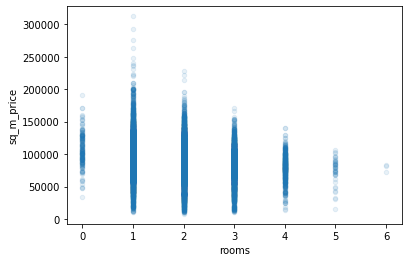

In [48]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'rooms')

Видим небольшую обратную корреляцию - средняя стоимость кв.метра снижается по мере роста количества комнат.

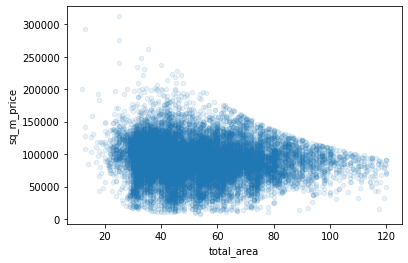

In [49]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'total_area')

В отношении зависимости между цено кв.метра и общей площадью видим интересный факт, средняя цена практически не меняется, но максимальная цена ощутимо снижается по мере роста общей площади.

In [50]:
# Рассмотрим зависимость между ценой и расстоянием от центра
aparts['sq_m_price'].corr(aparts['cityCenters_nearest'])

-0.6001938245069365

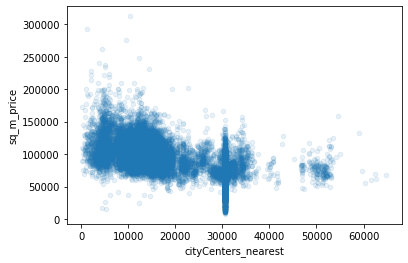

In [51]:
draw_plot(aparts, 'sq_m_price', 'cityCenters_nearest')

Видим обратную корреляцию - чем дальше от центра квартира, тем меньше стоимость кв.метра, это подтверждается графиком. Аномалия на графике около 30000 связана с заменой пропущенных значений, возможно стоило их вообще исключить.

In [52]:
# Рассмотрим взаимосвязь этажа квартиры и стоимсоти кв.метра
price_and_floor_types = aparts.loc[:, ['floor_type', 'sq_m_price']]

price_and_floor_types_corr = price_and_floor_types.floor_type.str.get_dummies(sep=' ').corrwith(price_and_floor_types.sq_m_price)
price_and_floor_types_corr

другой       0.222344
первый      -0.178511
последний   -0.112762
dtype: float64

Видим, что квартиры на первом и последнем этаже стоят дешевле, чем на остальных.

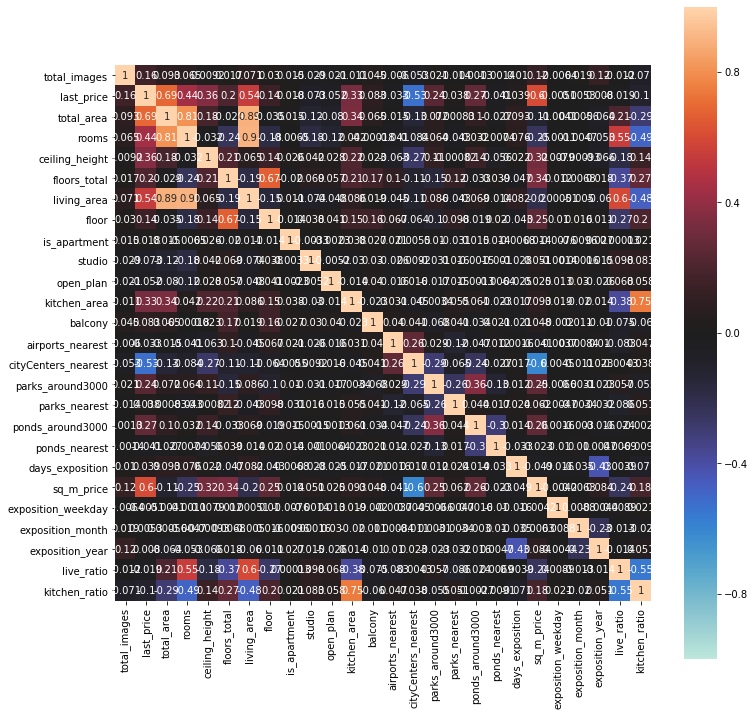

In [53]:
# Посмотрим корреляцию по всем данным при помощи heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(aparts.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

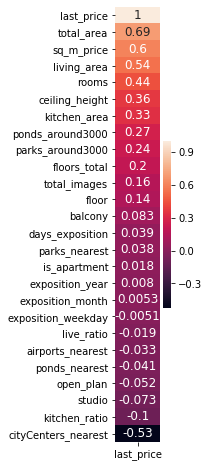

In [54]:
# Выберем стобец last_price, чтобы детально рассмотреть влияющие факторы
plt.figure(figsize=(1,8))
sns.heatmap(aparts.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot=True, annot_kws={'size':12})

По графику видно, что сильнее всего цена на квартиру зависит от общей площади квартиры (чем больше площадь, тем выше цена), цены за квадратный метр (ожидаемо), жилой площади, количества комнат, площади кухни и высоты потолков. Небольшое влияние оказывает наличие парков/водоемов рядом.
Достаточно сильную отрицательную корреляцию показывает удаленность от центра - чем дальше от центра, тем ниже цена.

In [55]:
# Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года
exposition_date = aparts.pivot_table(index=index, values=['exposition_weekday', 'exposition_month', 'exposition_year', 'sq_m_price'], aggfunc='mean')
exposition_date.corr()

,exposition_month,exposition_weekday,exposition_year,sq_m_price
exposition_month,1.000000,0.008819,-0.228852,0.006315
exposition_weekday,0.008819,1.000000,-0.004377,-0.004206
exposition_year,-0.228852,-0.004377,1.000000,0.084338
sq_m_price,0.006315,-0.004206,0.084338,1.000000


Корреляция очень низкая, рассмотрим графики корреляции.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae29ac7a10>,
      dtype=object)

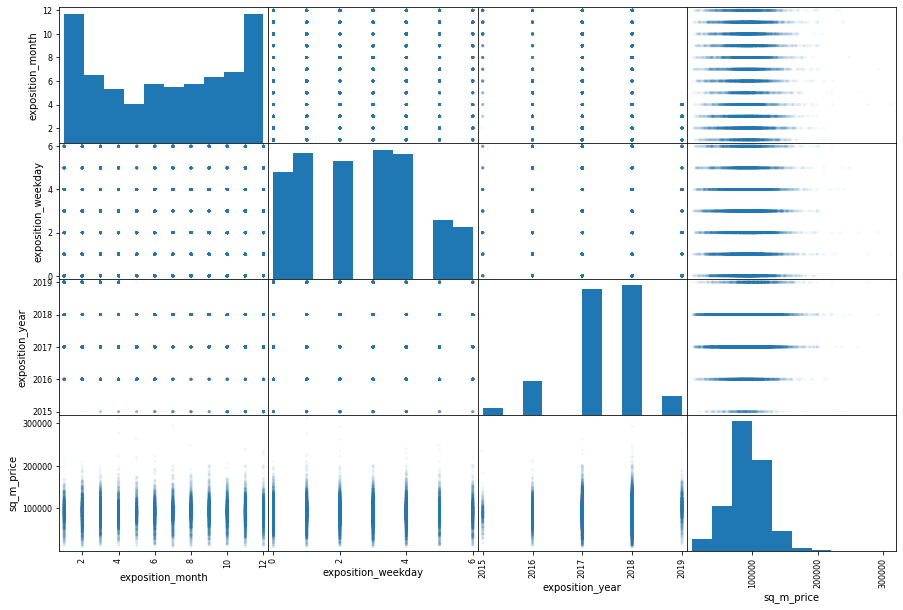

In [56]:
pd.plotting.scatter_matrix(exposition_date, figsize=(15, 10), alpha=0.05)

Корееляция не очевидна. но можно выделить следующие зависимости:   
+ в летние месяцы цена снижается, в мае - минимум;
+ цена квартиры немного ниже в объявлениях, размещенных на выходных;
+ стоимость квартир последовательно росла до 2018 года, но в 2019 снизилась.

**Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим населённые пункты с самой высокой и низкой стоимостью жилья.**

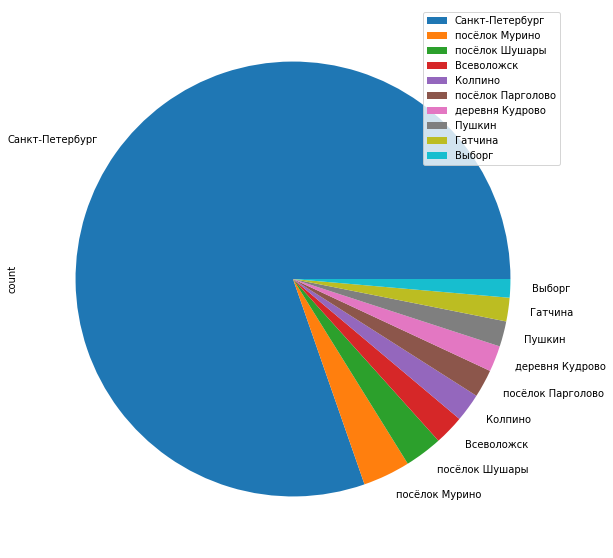

In [57]:
locality_sq_m_price = aparts[['locality_name', 'sq_m_price']].pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'mean'])
locality_sq_m_price.columns = ['count', 'mean_sq_m_price']
top10_locality = locality_sq_m_price.sort_values(by='count', ascending=False).head(10)
top10_locality.plot(y='count', kind='pie', figsize=(10, 10))

In [58]:
top10_locality.sort_values(by='mean_sq_m_price', ascending =False)

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,10988,103973.538406
Пушкин,258,99062.732558
деревня Кудрово,264,92550.579545
посёлок Парголово,284,89195.679577
посёлок Мурино,481,86071.557173
посёлок Шушары,384,77923.770833
Колпино,288,74482.149306
Гатчина,240,68304.750000
Всеволожск,303,66863.237624


Наибольшее количество объявлений и цена кв.метра ожидаемо в Санкт-Петрбурге. Самый дешевый кв.метр в Выборге.

**Выясним, какая область входит в центр.**

In [59]:
# Добавим столбец с округленным растоянием до центра в км
aparts['centers_nearest_km'] = (aparts['cityCenters_nearest']/1000).round().astype(int)

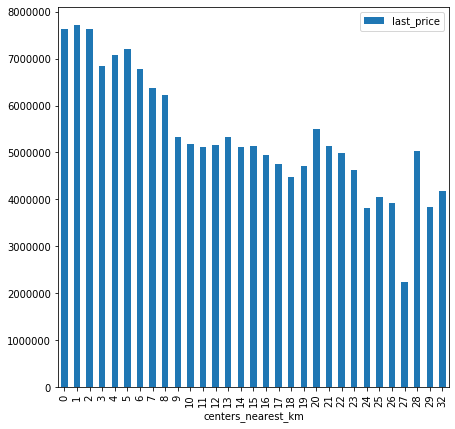

In [60]:
# Посчитаем среднюю цену для каждого километра в СПб
flats_in_spb = aparts.query('locality_name == "Санкт-Петербург"')
flats_in_spb.pivot_table(index='centers_nearest_km', values='last_price', aggfunc=('mean')).plot(y='last_price', kind='bar', figsize=(7, 7))

Видим падение цены начиная с 3 км., примем за "Центр" расстояние от 0 до 2 км.

**Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.**

In [61]:
# Выделим квартиры в центре СПб
flats_in_spb_center = flats_in_spb.query('centers_nearest_km < 3')

In [62]:
# Напишем функцию для построения диаграмм по нашей выборке
def draw_hist_spb(col, xmin=0, xmax=8):
    flats_in_spb_center[col].hist(bins=50, range=(xmin,xmax))

Рассмотрим следующие параметры: площадь, цена, число комнат, высота потолков.

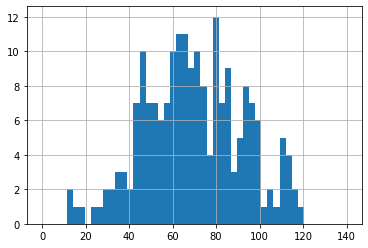

In [63]:
draw_hist_spb('total_area', xmax=140)

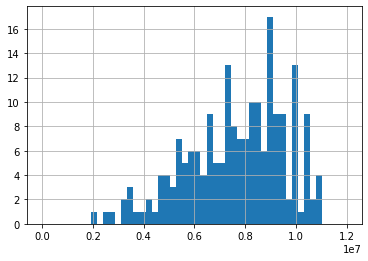

In [64]:
draw_hist_spb('last_price', xmax=12000000)

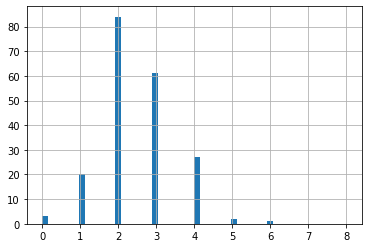

In [65]:
draw_hist_spb('rooms')

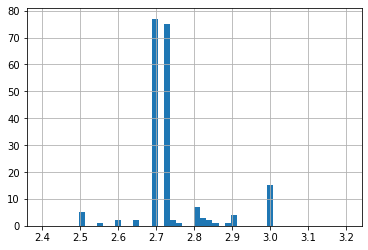

In [66]:
draw_hist_spb('ceiling_height', xmin=2.4, xmax=3.2)

In [67]:
flats_in_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,exposition_weekday,exposition_month,exposition_year,live_ratio,kitchen_ratio,centers_nearest_km
count,198.000000,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,...,198.000000,186.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,8.914141,7.655086e+06,69.788737,2.500000,2.741514,4.686869,41.90197,2.909091,13.517929,0.070707,...,2.272727,273.709677,135.090909,115884.590909,2.782828,6.454545,2017.222222,0.601695,0.200260,1.601010
std,5.981163,1.955525e+06,22.661091,0.970373,0.093439,1.062957,15.89624,1.371138,9.591004,0.370280,...,0.921466,208.609325,118.482245,31086.861202,1.730088,3.395347,0.825428,0.108584,0.119552,0.567655
min,0.000000,2.100000e+06,12.000000,0.000000,2.500000,2.000000,10.00000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,66872.000000,0.000000,1.000000,2015.000000,0.324450,0.042254,0.000000
25%,4.000000,6.362500e+06,53.700000,2.000000,2.700000,4.000000,30.50000,2.000000,8.200000,0.000000,...,2.000000,99.250000,41.750000,95078.000000,1.000000,3.250000,2017.000000,0.532445,0.123840,1.000000
50%,8.500000,7.900000e+06,68.950000,2.000000,2.734051,5.000000,40.60000,3.000000,10.200000,0.000000,...,3.000000,239.000000,93.000000,110061.000000,3.000000,7.000000,2017.000000,0.598704,0.157176,2.000000
75%,13.000000,9.100000e+06,85.000000,3.000000,2.734051,5.000000,51.00000,4.000000,14.750000,0.000000,...,3.000000,365.750000,207.500000,129013.750000,4.000000,9.000000,2018.000000,0.671357,0.225389,2.000000
max,32.000000,1.100000e+07,120.000000,6.000000,3.000000,8.000000,86.20000,6.000000,61.000000,4.000000,...,3.000000,841.000000,480.000000,292308.000000,6.000000,12.000000,2019.000000,0.957746,0.674419,2.000000


О квартирах в центре Санкт-Петербурга можем сделать следующие выводы:

* они имеют большую площадь - 60-80 кв.м по сравнению с 40-50 кв.м по региону. Медиана 69 кв.м vs 48;
* стоимость квартир в центре практически в 2 раза выше - медиана 7.9 млн. vs 4.3 млн.;
* очень мало однокомнатнх квартир по сравнению с выборкой по региону;
* потолки немного выше - медиана в центре - 2.8, в регионе - 2.7.

*Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).*

In [68]:
flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['rooms'])

-0.432663861003381

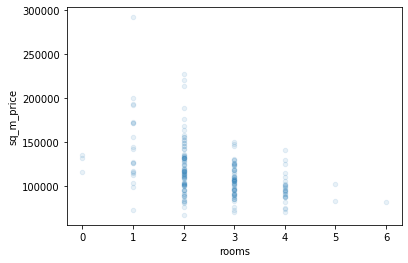

In [69]:
draw_plot(flats_in_spb_center,'sq_m_price','rooms')

Зависимость стоимости кв.метра от количества комнат в центре почти в 2 раза выше - с увеличением количества комнат, цена снижается сильнее, чем в среднем по выборке.

In [70]:
flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['cityCenters_nearest'])

-0.024707533988428326

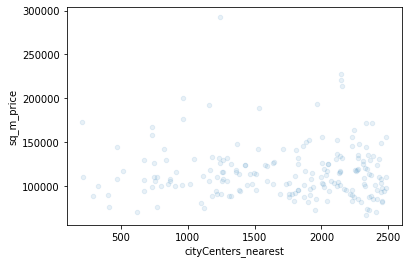

In [71]:
draw_plot(flats_in_spb_center,'sq_m_price','cityCenters_nearest')

Удаленность от центра практически не влияет на цену кв.м, так как все квартиры и так в центре.

In [72]:
flats_in_spb_center_floor_types = flats_in_spb_center[['floor_type', 'sq_m_price']]

flats_in_spb_center_floor_types_corr = flats_in_spb_center_floor_types.floor_type.str.get_dummies(sep=' ').corrwith(flats_in_spb_center_floor_types.sq_m_price)
flats_in_spb_center_floor_types_corr

другой       0.189997
первый      -0.112689
последний   -0.111568
dtype: float64

Стоимость на первом и последнем этажах по прежнему ниже, зависимость похожа на среднюю по всей выборке.

In [73]:
index1 = flats_in_spb_center.index
exposition_date_spb = flats_in_spb_center.pivot_table(index=index1, values=['exposition_weekday', 'exposition_month', 'exposition_year', 'sq_m_price'], aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae29121d90>,
      dtype=object)

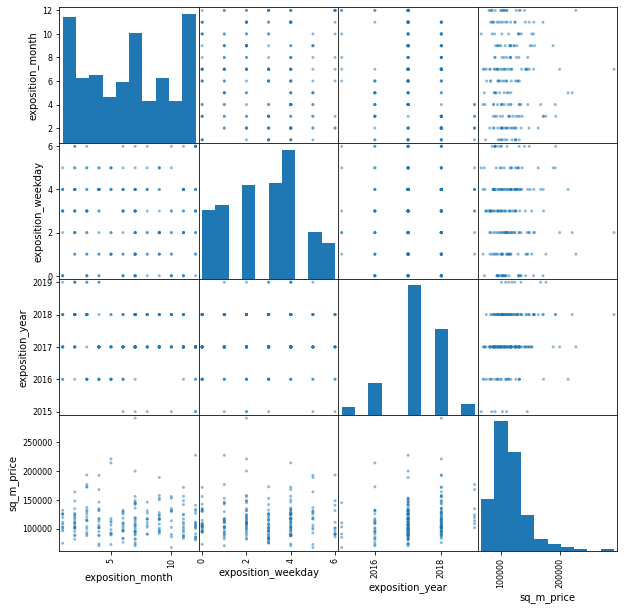

In [74]:
pd.plotting.scatter_matrix(exposition_date_spb, figsize=(10, 10))

Выводы по графику:
* Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных, как и в общей выборке;
* Квартиры, выставленные на продажу в мае, самые дешевые, как и в общей выборке;
* Рост стоимости по годам аналогичен общей выборке.

## Общий вывод

В ходе работы изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, чтобы выявить факторы, определяющие рыночную стоимость объектов недвижимости. Для выявления ключевых факторов были заполнены пропуски в значениях. типы данных приведены в соответствие. выбросы были исключены.
В ходе анализы были сделаны следующие выводы:

* половина квартир продается за 91 день;
* квартиры на первом и последнем этаже дешевле, чем на остальных;
* чем удаленнее квартира от центра. тем ниже стоимость кв.м. Самые дорогие квартире в центре СПб;
* дороже всего кадратный метр стоит в Санкт-Петербурге, дешевле всего в Выборге;
* квартиры в центре СПб имеют бОльшую площадь, больше комнат и более высокие потолки, чем в других районах и населенных пунктах;
* квартиры, выставленные на продажу в летние месяцы и мае дешевле, чем в другие месяцы; 
* квартиры, выставленные на продажу на выходных, дешевле, чем в будни; 
* рост стоимости квартир был последовательным с 2015 по 2018 гг., в 2019 г. произошло снижение стоимости.